# Amazon’s Customer Says Feature

### Put Your OPENROUTER_API_KEY here

In [ ]:
import os
os.environ["OPENROUTER_API_KEY"] = "paste_your_api_key_here"

In [ ]:
!pip3 install langchain langchain_openai

In [ ]:
import os
from langchain_openai import ChatOpenAI

try:
    model_name
except NameError:
    model_name="openai/gpt-4o-mini"

print("Model Name:", model_name)
print("Provider:", "OpenRouter AI")

llm=ChatOpenAI(model_name=model_name,
               openai_api_key=os.environ.get("OPENROUTER_API_KEY"),
               openai_api_base="https://openrouter.ai/api/v1")

In [ ]:
import textwrap
from langchain_core.prompts import ChatPromptTemplate

def wrap_text(text, max_width=80):
    """
    Wraps the text to the specified max_width, preserving line breaks and formatting.
    """
    text = text.lstrip()
    lines = text.splitlines()  # Split the text into lines
    wrapped_lines = []
    for line in lines:
        if line.strip():  # Skip empty lines
            wrapped_line = textwrap.fill(line, max_width, initial_indent='', subsequent_indent='')
            wrapped_lines.extend(wrapped_line.splitlines())  # Preserve line breaks
        else:
            wrapped_lines.append('')  # Keep empty lines
    return '\n'.join(wrapped_lines)

def print_prompt_and_response(prompt, response):
    print("Prompt: ")
    print(wrap_text(prompt))
    print("")
    print("Response: ")
    print(response)

def print_messages_and_response(messages, response):
    prompt = ChatPromptTemplate(messages=messages)
    print_prompt_and_response(prompt.format(), response)

def get_completion(prompt, temperature=0.0):
    response = llm.invoke(prompt, temperature=temperature)
    wrapped_response = wrap_text(response.content)
    return wrapped_response

def get_completion_messages(messages, temperature=0.0):
    response=llm.invoke(messages, temperature=temperature)
    wrapped_response = wrap_text(response.content)
    return wrapped_response

## Customers Say

We would like to reproduce some of Amazon’s “Customers Say” summary, for
a product. For example see here: [Customer Reviews for BIG DART
Blouses](https://www.amazon.com/Womens-Blouses-Sleeve-Button-Fashion/dp/B08NYQN9ZY/ref=cm_cr_arp_d_product_top?ie=UTF8&th=1)

The Customers Say feature is described by Amazon
[here](https://www.aboutamazon.com/news/amazon-ai/amazon-improves-customer-reviews-with-generative-ai).

Here is what the one for our product looks like:

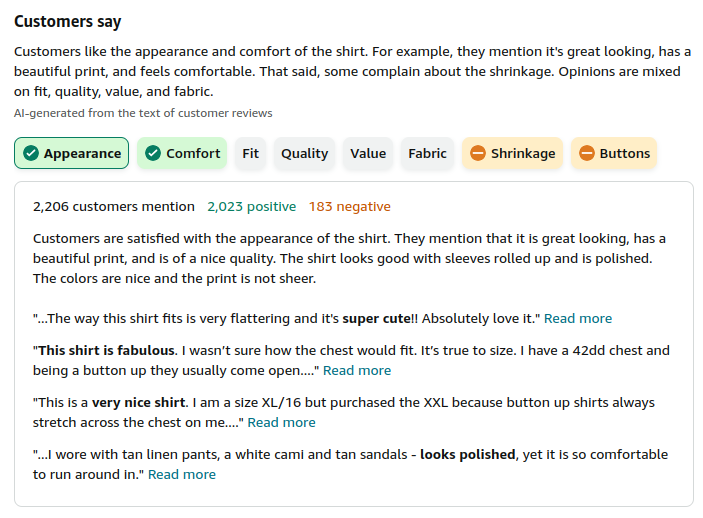

## Customer Say Features

First there is a brief summary of the product.

Then there are some product attributes tags (called “product insights”
or “product attributes by Amazon in the reference above)

Some of the product attributes are colored green and have a green check,
some are colored grey and some are colored yellow with a minus sign.

The green colored product attributes are where the majority of customers
mentioning that attribute are mentioning it in a positive aspect.

Similarly the yellow colored product attributes are where the majority
of customer mentions are in a negative aspect about that attribute.

The grey colored ones are where the positive and negative mentions are
roughly equal.

## The Reviews

Let’s take a look at some reviews

In [ ]:
first_review = """So close! Aside from the technical issues — I ordered a small
of the less busy face pattern, and received a medium in the more busy face
pattern option instead. I’m 5’6” 135-140lbs. The sizes were European. This
medium was a little big but still would have felt cute, if not for the collar
and neckline. The collar has a high backing that doesn’t allow it to fall too
well around your neck, and since the fabric is very thin and one-sided, you can
see the back of the pattern when the collar is open (see photos). While okay for
casual wear, and has a great boxy cut, the exposed back of fabric feels a bit
cheap. Shirt is a good length for tucking in and a bit long otherwise."""

second_review = """I love the pattern on this shirt, and I wanted to keep it so
badly!! A few issues, though, made me send it back. 1 - The shirt looks much
shinier/glossier on the models, and it's not. It's not shiny at all. It's a
very nice fabric that is lightweight, but it hangs a lot differently that what
was shown. 2 - The front is very short. The back hangs down nicely, but if you
want to hide any tummy issues, this shirt won't do it for you. I also felt like
my arms couldn't come up any or the shirt would be too high. I do a lot of
presenting so this was a no go for me. 3 - The stitching on the front pulls
oddly, so although it was big enough to button across the chest area, the
stitching made it seem as though it was pulling even when it wasn't. Could just
be my experience, but I don't like looking like the shirt is barely holding on,
ha. I am 5'4 with a more muscular build (wide shoulders too) so that might be
part of it. I love this shirt and wish it would work for me, but the shortness
of it and the way it pulls made it a no-go."""

third_review = """I read the reviews and sized up. You prop could do your normal
size depending on body shape. I like the shirt, so fun for work. Only thing I
wish the inside of the shirt was a black color so when I roll the sleeves up
it's not a white color. Not a deal breaker. It's a long shirt that covered my
bum if you wanted to wear over leggings"""

fourth_review = """I love these shirts. Patterns, fabric, and construction are
wonderful. My usual extra-large size fit me perfectly - until I washed them in
warm water and dried them on low-medium setting (what was I thinking). They
shrunk a full size all around. Because I like these shirts so much I am
reordering my original and adding a couple more colors, BUT this time I will
wash COLD, Gentle cycle, and Hang dry!"""

fifth_review = """1 star since 0 is not an option-The color was not as pictured-
I thought it was more of a cream and it was stark white. However, I figured I
could make do. I tried it on, it fit, I washed before wearing. Put it on and it
had shrunk at least two sizes!"""

sixth_review = """This shirt is fabulous. I wasn’t sure how the chest would fit.
It’s true to size. I have a 42dd chest and being a button up they usually come
open. This shirt fit beautifully. It wasn’t cut like a man’s cut and it wasn’t
too slim of a women’s either. It’s absolutely perfect. I’m going back for more
solids and styles. I have the black one with the female faces. Let’s share
great finds and this is my own review. I didn’t receive anythhg for this. I
just want yuh to know the deal dealio. Update. Well I got other colors and I
don’t like them. :("""

seventh_review = """This is a very nice shirt. I am a size XL/16 but purchased
the XXL because button up shirts always stretch across the chest on me. I
actually think i'm going to buy another in a different pattern. I purchased the
leopard and received a ton of compliments. The only small cons are that it
could be slightly longer for tucking in and the cuffs are very loose. They are
not fitted on the wrist. Not deal-breakers, just could be improved."""

eighth_review = """I bought three of these, all the same size. They are pretty
soft and none were sheer, although I specifically ordered dark colors and/or
prints. There is not really any stretch to them at all, but I found the size
guide pretty accurate. The quality is mediocre: lots of little threads coming
from the seams and, while I strongly prefer this fabric to the more “satin”
feeling tops, it just does not seem very hardy.
The biggest downside is that these shirts shrink UP in the length and in the
sleeves (they didn’t shrink much in width, however). I have long arms and a
long torso, and these fit great before washing. Seeing how delicate they are, I
washed on the delicate cycle and laid flat to dry.
In the photos you see two shirts, both the same size. The leopard print has
been washed and laid flat to dry (NOT put in the dryer), and the colorful print
has not yet been washed. You can see both the sleeve length and the body length
have shrunk nearly 2 inches. The top now looks boxy on me and the sleeves
almost comically short."""

ninth_review = """The blouse is made well although the buttons and button holes are
half the size (diameter) of regular buttons. The checkered pattern is nice but
the size is way off. I measure 32.5" on the bust and the Medium size blouse
says it is supposed to be 39.5 inches on the bust. So I ordered medium.
However, it was barely 33 inches! And if I inhaled, the button hole would pull
tight. So the size is completely off with regards to the chart. Now I'm
wondering if I should go two sizes up to an XL but the problem is the chart.
Maybe that is waaaay off as well. So it goes back to the Amazon shelf."""

tenth_review = """I was really hopeful of the design and the review pictures I saw
of people wearing theirs and got even more hopeful. I really like the
randomness of the pattern and the color pop. Sadly the way mine came out was
not as random. Both of the front panels of the shirt are identical, in that you
see the same pattern, in the same order, side by side, so it's not really
random at all and really takes away from the design I think. It fits great
though, and love the colors. Fabric is thin and you can see through it in
holding it up to the light, so I wore a light undershirt to try it on.
Everything else is perfectly acceptable, although a little pricey for the
materials, but I'm guessing some of that cost goes to the print and super
vibrant colors."""

Time to try to prompt the LLM to handle some of the above.

-   Ask the LLM to summarize the reviews
-   Ask the LLM to identify the product attributes
-   Ask the LLM to list the number of positive and negative mentions of
    the product attributes
-   Ask the LLM to produce a few quotes for each product attribute

In [ ]:
template="""

CODE

Reviews:
1)
{review1}
2)
{review2}
3)
{review3}
4)
{review4}
5)
{review5}
6)
{review6}
7)
{review7}
8)
{review8}
9)
{review9}
10)
{review10}


Response:
Summary:<<your summary here>>
Tags:<<your tags here>>
"""

prompt=template.format(review1=first_review,
                     review2=second_review,
                     review3=third_review,
                     review4=fourth_review,
                     review5=fifth_review,
                     review6=sixth_review,
                     review7=seventh_review,
                     review8=eighth_review,
                     review9=ninth_review,
                     review10=tenth_review)

response = get_completion(prompt)
print(response)

In [ ]:
# Solution:
template="""
Given the following reviews write a one paragraph summary of what
customers are saying about this product.

Come up with a short set of one word tags that involve things the customers
mention most frequently. These can be things that customers mention in a
positive way, or a negative way, or a neutral way.

For each tag give the total number of positive mentions and the total number of
negative mentions. Give short snippets of quotes that support your numbers.

Reviews:
1)
{review1}
2)
{review2}
3)
{review3}
4)
{review4}
5)
{review5}
6)
{review6}
7)
{review7}
8)
{review8}
9)
{review9}
10)
{review10}

Response:
Summary:<<your summary here>>
Tags:<<your tags here>>
"""

prompt=template.format(review1=first_review,
                     review2=second_review,
                     review3=third_review,
                     review4=fourth_review,
                     review5=fifth_review,
                     review6=sixth_review,
                     review7=seventh_review,
                     review8=eighth_review,
                     review9=ninth_review,
                     review10=tenth_review)

response = get_completion(prompt)
print(response)